# Class cleaning sense checks

In [2]:
import sys
sys.path.append('../')
from data_cleaner import TaxiDataCleaner
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a = TaxiDataCleaner('/Users/haekim/dev/taxis-and-ubers/data/monthly_data/yellow_taxi_2009-01.parquet')

In [4]:
a.data

,vendor_name,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,Rate_Code,store_and_forward,dropoff_longitude,dropoff_latitude,Payment_Type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14092408,VTS,2009-01-27 14:36:00,2009-01-27 14:46:00,5,0.89,-73.982013,40.743330,NaN,NaN,-73.994328,40.750130,CASH,6.5,0.0,NaN,0.00,0.0,6.50
14092409,VTS,2009-01-27 13:56:00,2009-01-27 14:02:00,1,1.94,-73.972788,40.761988,NaN,NaN,-73.951477,40.778217,Credit,8.1,0.0,NaN,1.90,0.0,10.00
14092410,CMT,2009-01-23 08:39:44,2009-01-23 09:02:15,1,3.80,-73.977467,40.751861,NaN,NaN,-74.009913,40.713470,Cash,14.5,0.0,NaN,0.00,0.0,14.50
14092411,VTS,2009-01-24 23:05:00,2009-01-24 23:15:00,3,3.85,-73.981295,40.753000,NaN,NaN,-73.949453,40.779520,CASH,10.9,0.5,NaN,0.00,0.0,11.40


In [5]:
a.clean_data()

In [ ]:
from scipy.stats import zscore

a.data[]
zscore(a.data['trip_time_in_mins']).sort_values()

7629834     -0.568559
13793773    -0.567217
11277509    -0.567217
3345171     -0.566881
1775600     -0.566881
              ...    
6360631     26.726583
13707789    27.612375
2261590     27.672770
12266754    34.128985
7150295     97.539945
Name: trip_time_in_mins, Length: 134270, dtype: float64

In [7]:
a.data['pickup_datetime']

41          2009-01-21 14:38:05
73          2009-01-06 14:51:53
116         2009-01-07 13:12:59
131         2009-01-07 08:39:19
395         2009-01-23 13:38:00
                   ...         
14091782    2009-01-21 13:47:00
14091897    2009-01-19 20:05:00
14091969    2009-01-16 05:51:00
14092150    2009-01-29 18:07:00
14092385    2009-01-23 13:41:06
Name: pickup_datetime, Length: 134270, dtype: object

In [10]:
a.data['time_diff'] = (pd.to_datetime(a.data['dropoff_datetime']) - pd.to_datetime(a.data['pickup_datetime'])).dt.total_seconds() / 60

In [14]:
a.data['time_diff']

41          31.766667
73          29.700000
116         17.666667
131         34.600000
395         27.000000
              ...    
14091782    20.000000
14091897    33.000000
14091969    11.000000
14092150    32.000000
14092385    43.216667
Name: time_diff, Length: 134270, dtype: float64

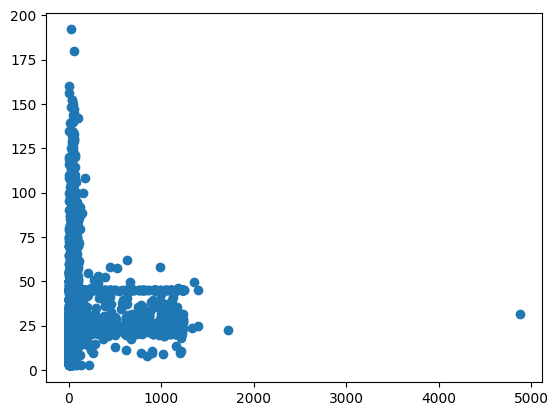

In [11]:
plt.scatter(a.data['time_diff'], a.data['fare_amount'])